# Logistic Regression: Probabilistic Classification

## Objective
Demonstrate how logistic regression performs binary classification
by estimating probabilities and learning a linear decision boundary.

## Background

Unlike linear regression, classification models must output probabilities.
Logistic regression achieves this by applying a sigmoid function to a
linear model, mapping real-valued scores to probabilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


## Dataset

We generate a synthetic binary classification dataset with two features
to allow visualization of the decision boundary.

## Logistic Regression Model

We train a logistic regression model, which estimates
P(y = 1 | x) using a sigmoid-transformed linear function.

In [3]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42
)


The model learns a linear decision boundary in feature space.

## Probability Estimation

Logistic regression outputs probabilities rather than class labels.
These probabilities represent model confidence.

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X, y)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
log_reg.predict_proba(X[:5])

The model outputs probabilities for both classes.
Classification is performed by applying a threshold (commonly 0.5).

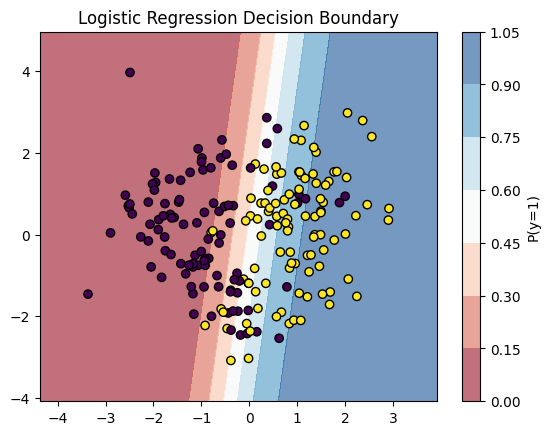

In [5]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)

X_grid = np.c_[x0.ravel(), x1.ravel()]
probs = log_reg.predict_proba(X_grid)[:, 1]
probs = probs.reshape(x0.shape)

plt.contourf(x0, x1, probs, cmap="RdBu", alpha=0.6)
plt.colorbar(label="P(y=1)")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("Logistic Regression Decision Boundary")
plt.show()


### Interpretation

- The color gradient represents predicted probability
- The decision boundary corresponds to P(y=1) = 0.5
- Points near the boundary are more uncertain

## Decision Thresholds

The default threshold of 0.5 is arbitrary.
In practice, the threshold can be adjusted to trade off
false positives and false negatives.

## Regularization

Logistic regression uses L2 regularization by default.
Regularization controls model complexity and improves generalization,
especially when features are correlated.

## Key Takeaways

- Logistic regression is a probabilistic classification model
- It outputs probabilities, not just class labels
- The decision boundary is linear in feature space
- Threshold selection affects precision and recall
- Regularization controls variance